In [23]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
import seaborn as sns 
plt.rcParams['figure.figsize'] = [16, 12]


In [106]:
image = cv2.imread("./2.jpg")

def mouse_callback(event, x, y, flags, param):
    global positions
    global image 
    
    if event == cv2.EVENT_LBUTTONDOWN:
        positions.append((x, y))
        cv2.circle(image, positions[-1], 8, (91, 80, 242), -1)

cv2.namedWindow("Image")
cv2.setMouseCallback("Image", mouse_callback)
positions = []

while True:
    # Display the image
    cv2.imshow("Image", image)
    # Check for key press
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        cv2.destroyWindow("Image")
        cv2.destroyAllWindows()
        cv2.waitKey(1)
        break

# Close all windows
cv2.destroyAllWindows()
position = np.reshape(positions,(-1,2))
print(position)
# First select left-top,right-bot,left-bot,right-top

[[448 100]
 [585 280]
 [485 281]
 [511 100]]


1790 628


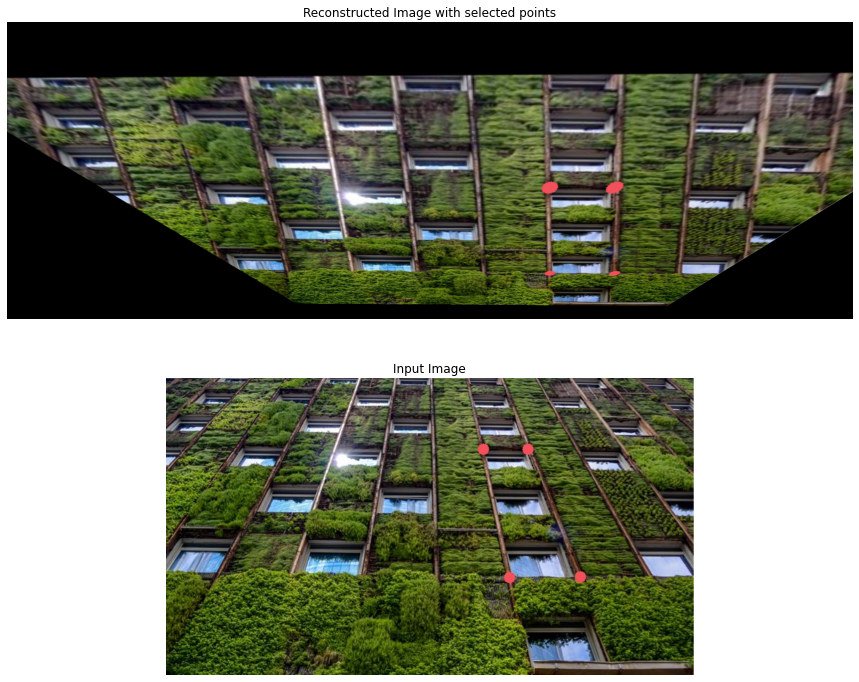

In [109]:

pts_src = position.copy()
X_min,Y_min,X_max,Y_max= *pts_src.min(axis=0),*pts_src.max(axis=0)
ver_shift,hor_shift = 700,250
X_min,Y_min,X_max,Y_max = X_min+ver_shift,Y_min+hor_shift,X_max+ver_shift,Y_max+hor_shift

pts_dst_1 = np.array([[X_min, Y_min],[X_max, Y_max],[X_min, Y_max],[X_max, Y_min]])
pts_dst_2 = np.array([[Y_min, X_min],[Y_max, X_max],[Y_min, X_max],[Y_max, X_min]])

h, status = cv2.findHomography(pts_src, pts_dst_1)

out_scale_1,out_scale_2 = 1.5,2.4
W,H = image.shape[:2][::-1]
W,H = int(out_scale_2*W),int(out_scale_1*H)
print(W,H)
im_out_1 = cv2.warpPerspective(image, h, (W,H))


plt.subplot(2,1,1)
plt.imshow(im_out_1[:,:,::-1])
plt.title("Reconstructed Image with selected points")
plt.axis("off")
plt.subplot(2,1,2)
out_scale_1,out_scale_2 = 2,2
W,H = image.shape[:2][::-1]
W,H = int(out_scale_2*W),int(out_scale_1*H)
img_resize = cv2.resize(image,(W,H),interpolation=cv2.INTER_CUBIC)
plt.imshow(img_resize[:,:,::-1])
plt.title("Input Image")
plt.axis("off")
plt.show()

In [20]:
[[448 100]
 [585 280]
 [485 281]
 [511 100]]

((419, 746, 3), (419, 746, 3))